In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

In [2]:
with open(r"memory/experiment_nr_5020230715-144614.pkl", 'rb') as f:
    res_log = pkl.load(f)

In [3]:
res_log[0]['parameters']

{'n': 600,
 'p': 1000,
 'm': 20,
 'noise_level_lst': [0.05],
 'model_name': 'BOMP',
 'cv_num': 5,
 'trial_num': 10,
 'param_grid': {'K': array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
          66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126,
         131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191,
         196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256,
         261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321,
         326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386,
         391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451,
         456, 461, 466, 471, 476, 481, 486, 491, 496])},
 'fixed_params': {'N_bag': 300,
  'signal_bag_percent': 0.7,
  'atom_bag_percent': 0.9,
  'select_atom_percent': 0,
  'replace_flag': True,
  'agg_func': 'avg',
  'ignore_warning': True,
  'random_seed': 1}}

In [4]:
K_lst = res_log[0]['parameters']['param_grid']['K']
K_lst

array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126,
       131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191,
       196, 201, 206, 211, 216, 221, 226, 231, 236, 241, 246, 251, 256,
       261, 266, 271, 276, 281, 286, 291, 296, 301, 306, 311, 316, 321,
       326, 331, 336, 341, 346, 351, 356, 361, 366, 371, 376, 381, 386,
       391, 396, 401, 406, 411, 416, 421, 426, 431, 436, 441, 446, 451,
       456, 461, 466, 471, 476, 481, 486, 491, 496])

In [7]:
log = res_log[0]['log']
trial_num = 10

In [10]:
log[0]

{'noise_level': 0.05,
 'trial': 0,
 'cv_error_lst': array([3.78247871e-02, 1.13983054e-02, 4.88505724e-03, 4.24699559e-03,
        4.16134890e-03, 4.13520032e-03, 4.14645251e-03, 4.15845367e-03,
        4.17414467e-03, 4.20812029e-03, 4.21886208e-03, 4.22771119e-03,
        4.23419322e-03, 4.23749993e-03, 4.24645120e-03, 4.25053037e-03,
        4.24499367e-03, 4.24345202e-03, 4.25167809e-03, 4.25668461e-03,
        4.26092920e-03, 4.26426364e-03, 4.26643802e-03, 4.26205898e-03,
        4.26013581e-03, 4.25830750e-03, 4.25829201e-03, 4.25778789e-03,
        4.25790829e-03, 4.25793973e-03, 4.25912616e-03, 4.25894202e-03,
        4.25917055e-03, 4.25876240e-03, 4.25854683e-03, 1.76830290e-02,
        4.38745809e-03, 4.60018546e-01, 6.85097499e-01, 2.01080012e+00,
        1.19222319e+02, 4.51515776e+01, 5.51882043e+03, 1.65156831e+02,
        2.51796739e+02, 2.16164352e+02, 3.33011189e+02, 1.99091574e+02,
        2.83012871e+03, 3.03146534e+02, 1.70250242e+04, 5.91255494e+02,
        8.638

In [11]:
cv_err_lst = []

for i in range(trial_num):
    cv_err_lst.append(log[i]['cv_error_lst'])
    
cv_err_lst

[array([3.78247871e-02, 1.13983054e-02, 4.88505724e-03, 4.24699559e-03,
        4.16134890e-03, 4.13520032e-03, 4.14645251e-03, 4.15845367e-03,
        4.17414467e-03, 4.20812029e-03, 4.21886208e-03, 4.22771119e-03,
        4.23419322e-03, 4.23749993e-03, 4.24645120e-03, 4.25053037e-03,
        4.24499367e-03, 4.24345202e-03, 4.25167809e-03, 4.25668461e-03,
        4.26092920e-03, 4.26426364e-03, 4.26643802e-03, 4.26205898e-03,
        4.26013581e-03, 4.25830750e-03, 4.25829201e-03, 4.25778789e-03,
        4.25790829e-03, 4.25793973e-03, 4.25912616e-03, 4.25894202e-03,
        4.25917055e-03, 4.25876240e-03, 4.25854683e-03, 1.76830290e-02,
        4.38745809e-03, 4.60018546e-01, 6.85097499e-01, 2.01080012e+00,
        1.19222319e+02, 4.51515776e+01, 5.51882043e+03, 1.65156831e+02,
        2.51796739e+02, 2.16164352e+02, 3.33011189e+02, 1.99091574e+02,
        2.83012871e+03, 3.03146534e+02, 1.70250242e+04, 5.91255494e+02,
        8.63884805e+01, 5.48731739e+03, 1.41610742e+02, 7.157733

(0.0, 0.04)

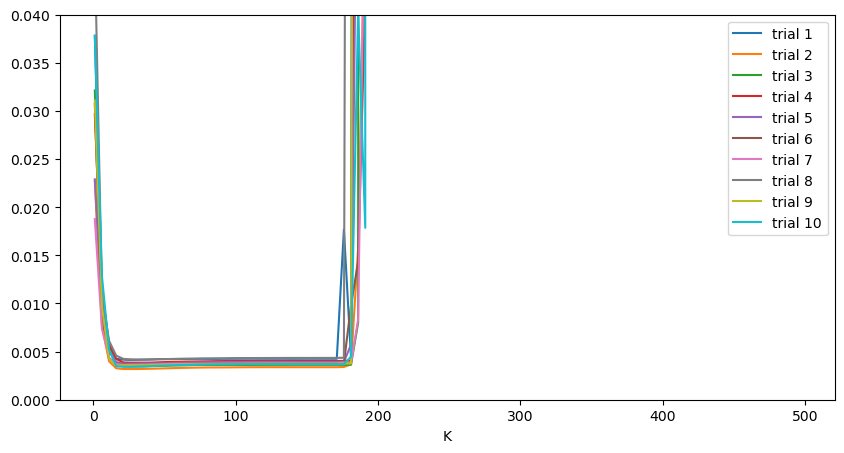

In [15]:
plt.subplots(figsize=(10, 5))

for i in range(trial_num):
    plt.plot(K_lst, cv_err_lst[i], label='trial {}'.format(i+1))

plt.xlabel('K')
plt.legend()
plt.ylim(0, 0.04)

In [25]:
best_K = []

for i in range(trial_num):
    best_K.append(log[i]['best_params']['K'])
    
best_K

[26, 26, 26, 26, 26, 31, 21, 31, 21, 21]